<a href="https://colab.research.google.com/github/shreyasrajesh0308/Deep_Learning/blob/master/Deep_Learning_Book_Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 - Introduction to Keras and Tensorflow

In [ ]:
  import tensorflow as tf

## Constant Tensors and Variables

Define a tensor with shape 2,1 and filled with ones throught 

In [ ]:
x = tf.ones(shape=(2, 1))

In [ ]:
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


Define a tensor with shape 2,1 filled with zeros

In [ ]:
x = tf.zeros(shape=(2,1))

In [ ]:
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Define a tensor of shape 3,1 where elements are picked from a random distribution with mean 0 and standard deviation 1

In [ ]:
x = tf.random.normal(shape=(3,1), mean = 0., stddev=1.)

In [ ]:

print(x)

tf.Tensor(
[[ 1.7605513]
 [-1.3619081]
 [-1.0713067]], shape=(3, 1), dtype=float32)


Define a tensor of shape 3,1 where elements are picked from a uniform distribution with minval 0 and maxval 1

In [ ]:
x = tf.random.uniform(shape=(3,1), minval = 0, maxval =1)

In [ ]:
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.5336827 ],
       [0.09293365],
       [0.20617974]], dtype=float32)>

But one caveat with tensors is that their values are not assignable that is particular values cannot be changed for example 

In [ ]:
x[0][0] = 10

TypeError: ignored

 But since weights in our network are stored as tensors, how can these update if they cannot be assigned to a value, to do this we have the variable class, which makes these tensors a variable

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

In [ ]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.11010826],
       [ 0.08311051],
       [-0.1721246 ]], dtype=float32)>

In [ ]:
v.assign(tf.ones(shape=(3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [ ]:
v[0, 0].assign(100)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[100.],
       [  1.],
       [  1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[101.],
       [  2.],
       [  2.]], dtype=float32)>


Performing some math operations in tensorflow

In [ ]:
a = tf.ones(shape=(2,2))
b = tf.sqrt(a)
c = tf.sqrt(a)
d = b+c
e = tf.matmul(a, b)
e*=d

In [ ]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

Now, we look at the GradientTape API, that is computing the gradient of any differntiable expression

In [ ]:
input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape: 

  result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

In [ ]:
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


Here what if the tensor is not a variable but is instead some type of constant, by default all trainable variables are tracked but in order to track a normal tensor we would have to explicitly tell tensorflow to watch the variable.

In [ ]:
input_const = tf.constant(3.)

with tf.GradientTape() as tape:

  tape.watch(input_const)
  result = tf.square(input_const)

gradient = tape.gradient(result, input_const)

In [ ]:
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


Calculating second order gradients using GradientTape

In [ ]:
time = tf.Variable(0.)

with tf.GradientTape() as outer_tape:

  with tf.GradientTape() as inner_tape:

    position = 4.9*time**2
  
  speed = inner_tape.gradient(position, time)
  acc = outer_tape.gradient(speed, time)

In [ ]:
print(acc)  
print(speed)

tf.Tensor(9.8, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


## Implementing a Linear Classifier in Pure Tensorflow

The first step is to come up with data to work on     

Generating two classes of random points in a 2d plane

In [ ]:
import numpy as np 

In [ ]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0,3],  cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(mean=[3,0],  cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)


Stack the input arguments together

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs[0])

[-0.72749585  1.9650797 ]


Create the Target array i.e the predictions

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

Plotting the data we have

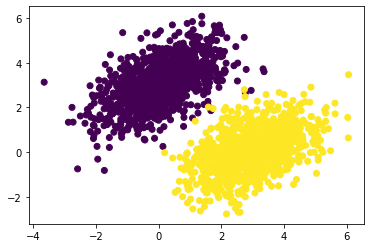

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) 
plt.show()

The linear transformation will be an Affine Transformation given by prediction = Wx + b.

Creating the variables for the linear classifier

In [ ]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape = (output_dim, )))

Define a Forward Pass

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Define the Loss Function. We calculate the per sample loss then reduce that to the mean of the entire sample. 

In [ ]:
def square_loss(targets, predictions):

  per_sample_loss = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_loss)

Write the Training loop 

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):

  with tf.GradientTape() as tape:

    predictions = model(inputs)
    loss = square_loss(targets, predictions)

  grad_loss_wrt_W , grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W*learning_rate)
  b.assign_sub(grad_loss_wrt_b*learning_rate)

  return loss

In [ ]:
for step in range(40):

  loss = training_step(inputs, targets)
  print(f"Loss at step {step} is {loss:.4f}")

Loss at step 0 is 0.1041
Loss at step 1 is 0.0818
Loss at step 2 is 0.0745
Loss at step 3 is 0.0699
Loss at step 4 is 0.0662
Loss at step 5 is 0.0628
Loss at step 6 is 0.0596
Loss at step 7 is 0.0568
Loss at step 8 is 0.0542
Loss at step 9 is 0.0518
Loss at step 10 is 0.0496
Loss at step 11 is 0.0476
Loss at step 12 is 0.0457
Loss at step 13 is 0.0440
Loss at step 14 is 0.0425
Loss at step 15 is 0.0411
Loss at step 16 is 0.0398
Loss at step 17 is 0.0386
Loss at step 18 is 0.0375
Loss at step 19 is 0.0365
Loss at step 20 is 0.0356
Loss at step 21 is 0.0347
Loss at step 22 is 0.0340
Loss at step 23 is 0.0332
Loss at step 24 is 0.0326
Loss at step 25 is 0.0320
Loss at step 26 is 0.0315
Loss at step 27 is 0.0310
Loss at step 28 is 0.0305
Loss at step 29 is 0.0301
Loss at step 30 is 0.0297
Loss at step 31 is 0.0293
Loss at step 32 is 0.0290
Loss at step 33 is 0.0287
Loss at step 34 is 0.0285
Loss at step 35 is 0.0282
Loss at step 36 is 0.0280
Loss at step 37 is 0.0278
Loss at step 38 is 0.0

Plot Model Predictions

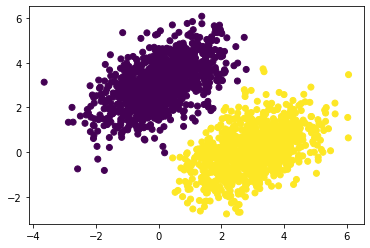

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Essentially we are learning just a line, since we have one affine transformation, Where the weight vector is a row vector. Hence the line that diffrentiates the two points is given as

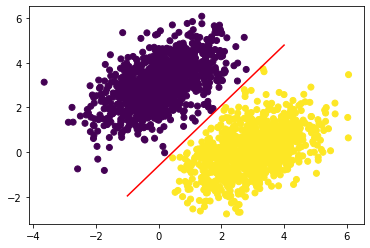

In [ ]:
x = np.linspace(-1, 4, 100)
y=-W[0]/ W[1]*x+(0.5-b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)


**This is really what a linear classifier is all about: finding the parameters of a line (or, in
higher-dimensional spaces, a hyperplane) neatly separating two classes of data**

## Understanding Core Keras API 

### Layers

The fundamental data structure in a Neural Network is a layer. A layer is a data processing module that takes as input one or more tensors and outputs one or more tensors

**Everything in Keras is either a Layer or something that closely interacts with a Layer**

A Layer is an object that encapsulates some state (weights) and some computation (a forward pass).

Sample Dense layer implemented with Layer

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

  def __init__(self, units, activation=None):

    super().__init__()
    self.units = units
    self.activation = activation
    self.built = False

  def build(self, input_shape):

    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
    self.b = self.add_weight(shape=(self.units), initializer = "zeros")

  def call (self, inputs):

    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

  def __call__(self, inputs):

    if not self.built:
      self.build(inputs.shape)
      self.built = True
    
    return self.call(inputs)



In [ ]:
my_dense = SimpleDense(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor)

tf.Tensor(
[[0.9388966  1.1601729  0.03667435 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.574136   0.6221903  0.         0.13674812 1.0629797  0.5542717
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.8032137  0.21980429 0.
  2.0649157  0.        ]
 [0.9388966  1.1601729  0.03667435 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.574136   0.6221903  0.         0.13674812 1.0629797  0.5542717
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.8032137  0.21980429 0.
  2.0649157  0.        ]], shape=(2, 32), dtype=float32)


The reason we create the call and buil method seperately is to infer the shape of the input to any layer on the fly, hence the build and call modules will be implemented inside __call__ module as shown above

Writing a simple model in Keras, note that the layers will automatically be compatible with input shape.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([layers.Dense(32, activation="relu"), layers.Dense(32)])

Using our simpledense

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(32),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")])

### Models  

A Deep Learning model is a graph of layers. In Keras this is the model class. 

Now so far we have only looked at the Sequential model, but there are other types of architectures we will at later that are not sequential. One thing to note is that these architecure choices essentially determine the hypothesis space whichh is the search space for us to get good representations of our data. Hence, picking a good architecture is more an art than a skill.                                                                                                                                                                                                                                                                                       

### Compile 

Once model architecture is defined three other parameters have to be chosen;

1. Loss Function - Qty minimized during training
2. Optimizer - Determines how the network updates based on the loss. Implements specific variant of SGD
3. Metrics - Measure of success you want to monitor during training and validation. These are not used for model training and hence need not be diffrentiable.

Consider an example

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)]) # Define a model for linear classification
model.compile(optimizer = "rmsprop", loss = "mean_squared_error", metrics=[keras.metrics.BinaryAccuracy()])
        

### Fit

The fit method implements the training loop

In [ ]:
history = model.fit(inputs, targets, epochs = 50, batch_size=128)

Epoch 1/50
16/16 [==============================] - 0s 5ms/step - loss: 7.6492 - binary_accuracy: 0.5170
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 7.2122 - binary_accuracy: 0.5170
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 6.8463 - binary_accuracy: 0.5190
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 6.4974 - binary_accuracy: 0.5200
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 6.1588 - binary_accuracy: 0.5205
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 5.8289 - binary_accuracy: 0.5220
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 5.5104 - binary_accuracy: 0.5210
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 5.2015 - binary_accuracy: 0.5215
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 4.9023 - binary_accuracy: 0.5230
Epoch 10/50
16/16 [==============================] - 0s

In [ ]:
history.history

{'binary_accuracy': [0.5170000195503235,
  0.5170000195503235,
  0.5189999938011169,
  0.5199999809265137,
  0.5205000042915344,
  0.5220000147819519,
  0.5210000276565552,
  0.5214999914169312,
  0.5230000019073486,
  0.5270000100135803,
  0.5254999995231628,
  0.5285000205039978,
  0.5329999923706055,
  0.5339999794960022,
  0.5360000133514404,
  0.5370000004768372,
  0.5404999852180481,
  0.5404999852180481,
  0.5414999723434448,
  0.5429999828338623,
  0.5450000166893005,
  0.546999990940094,
  0.5525000095367432,
  0.5515000224113464,
  0.5554999709129333,
  0.5590000152587891,
  0.5659999847412109,
  0.5715000033378601,
  0.5755000114440918,
  0.5845000147819519,
  0.5914999842643738,
  0.5989999771118164,
  0.6115000247955322,
  0.6159999966621399,
  0.6209999918937683,
  0.6269999742507935,
  0.6345000267028809,
  0.6499999761581421,
  0.6585000157356262,
  0.6664999723434448,
  0.6815000176429749,
  0.6940000057220459,
  0.7085000276565552,
  0.7239999771118164,
  0.7459999918

### Validation Data

Now the goal of ML, is to build systems that genaralizet to new data, hence we should also know and understand how the model performs on data it has never seen before. This validation set can be use it to compute a loss and metrics  value.

Below snippet choses around 30% randomly and splits into training and validation 

In [ ]:
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

In [ ]:
model.fit(training_inputs, training_targets, epochs = 5, batch_size=128, validation_data = (val_inputs, val_targets))

Epoch 1/5
11/11 [==============================] - 0s 23ms/step - loss: 0.2152 - binary_accuracy: 0.8150 - val_loss: 0.1945 - val_binary_accuracy: 0.8200
Epoch 2/5
11/11 [==============================] - 0s 7ms/step - loss: 0.2098 - binary_accuracy: 0.8257 - val_loss: 0.1896 - val_binary_accuracy: 0.8233
Epoch 3/5
11/11 [==============================] - 0s 6ms/step - loss: 0.2046 - binary_accuracy: 0.8343 - val_loss: 0.1849 - val_binary_accuracy: 0.8317
Epoch 4/5
11/11 [==============================] - 0s 7ms/step - loss: 0.1997 - binary_accuracy: 0.8386 - val_loss: 0.1804 - val_binary_accuracy: 0.8383
Epoch 5/5
11/11 [==============================] - 0s 8ms/step - loss: 0.1951 - binary_accuracy: 0.8429 - val_loss: 0.1763 - val_binary_accuracy: 0.8400


In [ ]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 4ms/step - loss: 0.1763 - binary_accuracy: 0.8400


In [ ]:
loss_and_metrics

[0.17630933225154877, 0.8399999737739563]

### Inference

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)

In [ ]:
print(predictions[:10])

[[ 1.0381653 ]
 [-0.13939185]
 [ 0.22064856]
 [-0.43192774]
 [ 0.26546165]
 [-0.2919848 ]
 [ 0.5840608 ]
 [-0.550303  ]
 [ 0.9358033 ]
 [ 0.9221184 ]]
